In [1]:
%pwd

'C:\\Users\\The Godfather'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
df = pd.read_csv(r"D:\Udacity DS\Lesson1\listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df.shape

(3585, 95)

In [6]:
#lets just have a set of columns so we can keep referring to it when needed
set(df.columns)

{'access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instant_bookable',
 'interaction',
 'is_location_exact',
 'jurisdiction_names',
 'last_review',
 'last_scraped',
 'latitude',
 'license',
 'listing_url

#### Lets see how many clumns have missing values and how many donot

In [7]:
clean_cols = (df.columns[df.isnull().mean()==0]) # set of columns that donot have missing values
clean_cols

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'state', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculat

In [8]:
missingval_cols = (df.columns[df.isnull().mean()>0]) # set of columns that have missing values
missingval_cols

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode',
       'market', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'has_availability', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month'],
      dtype='object')

In [9]:
print(clean_cols.shape)
print(missingval_cols.shape)

(51,)
(44,)


In [10]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### 1. Lets check how data in each column is distributed and also lets see how they are correlated to each other. This will help gain some preliminary insights on the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BFA085C50>,
      dtype=object)

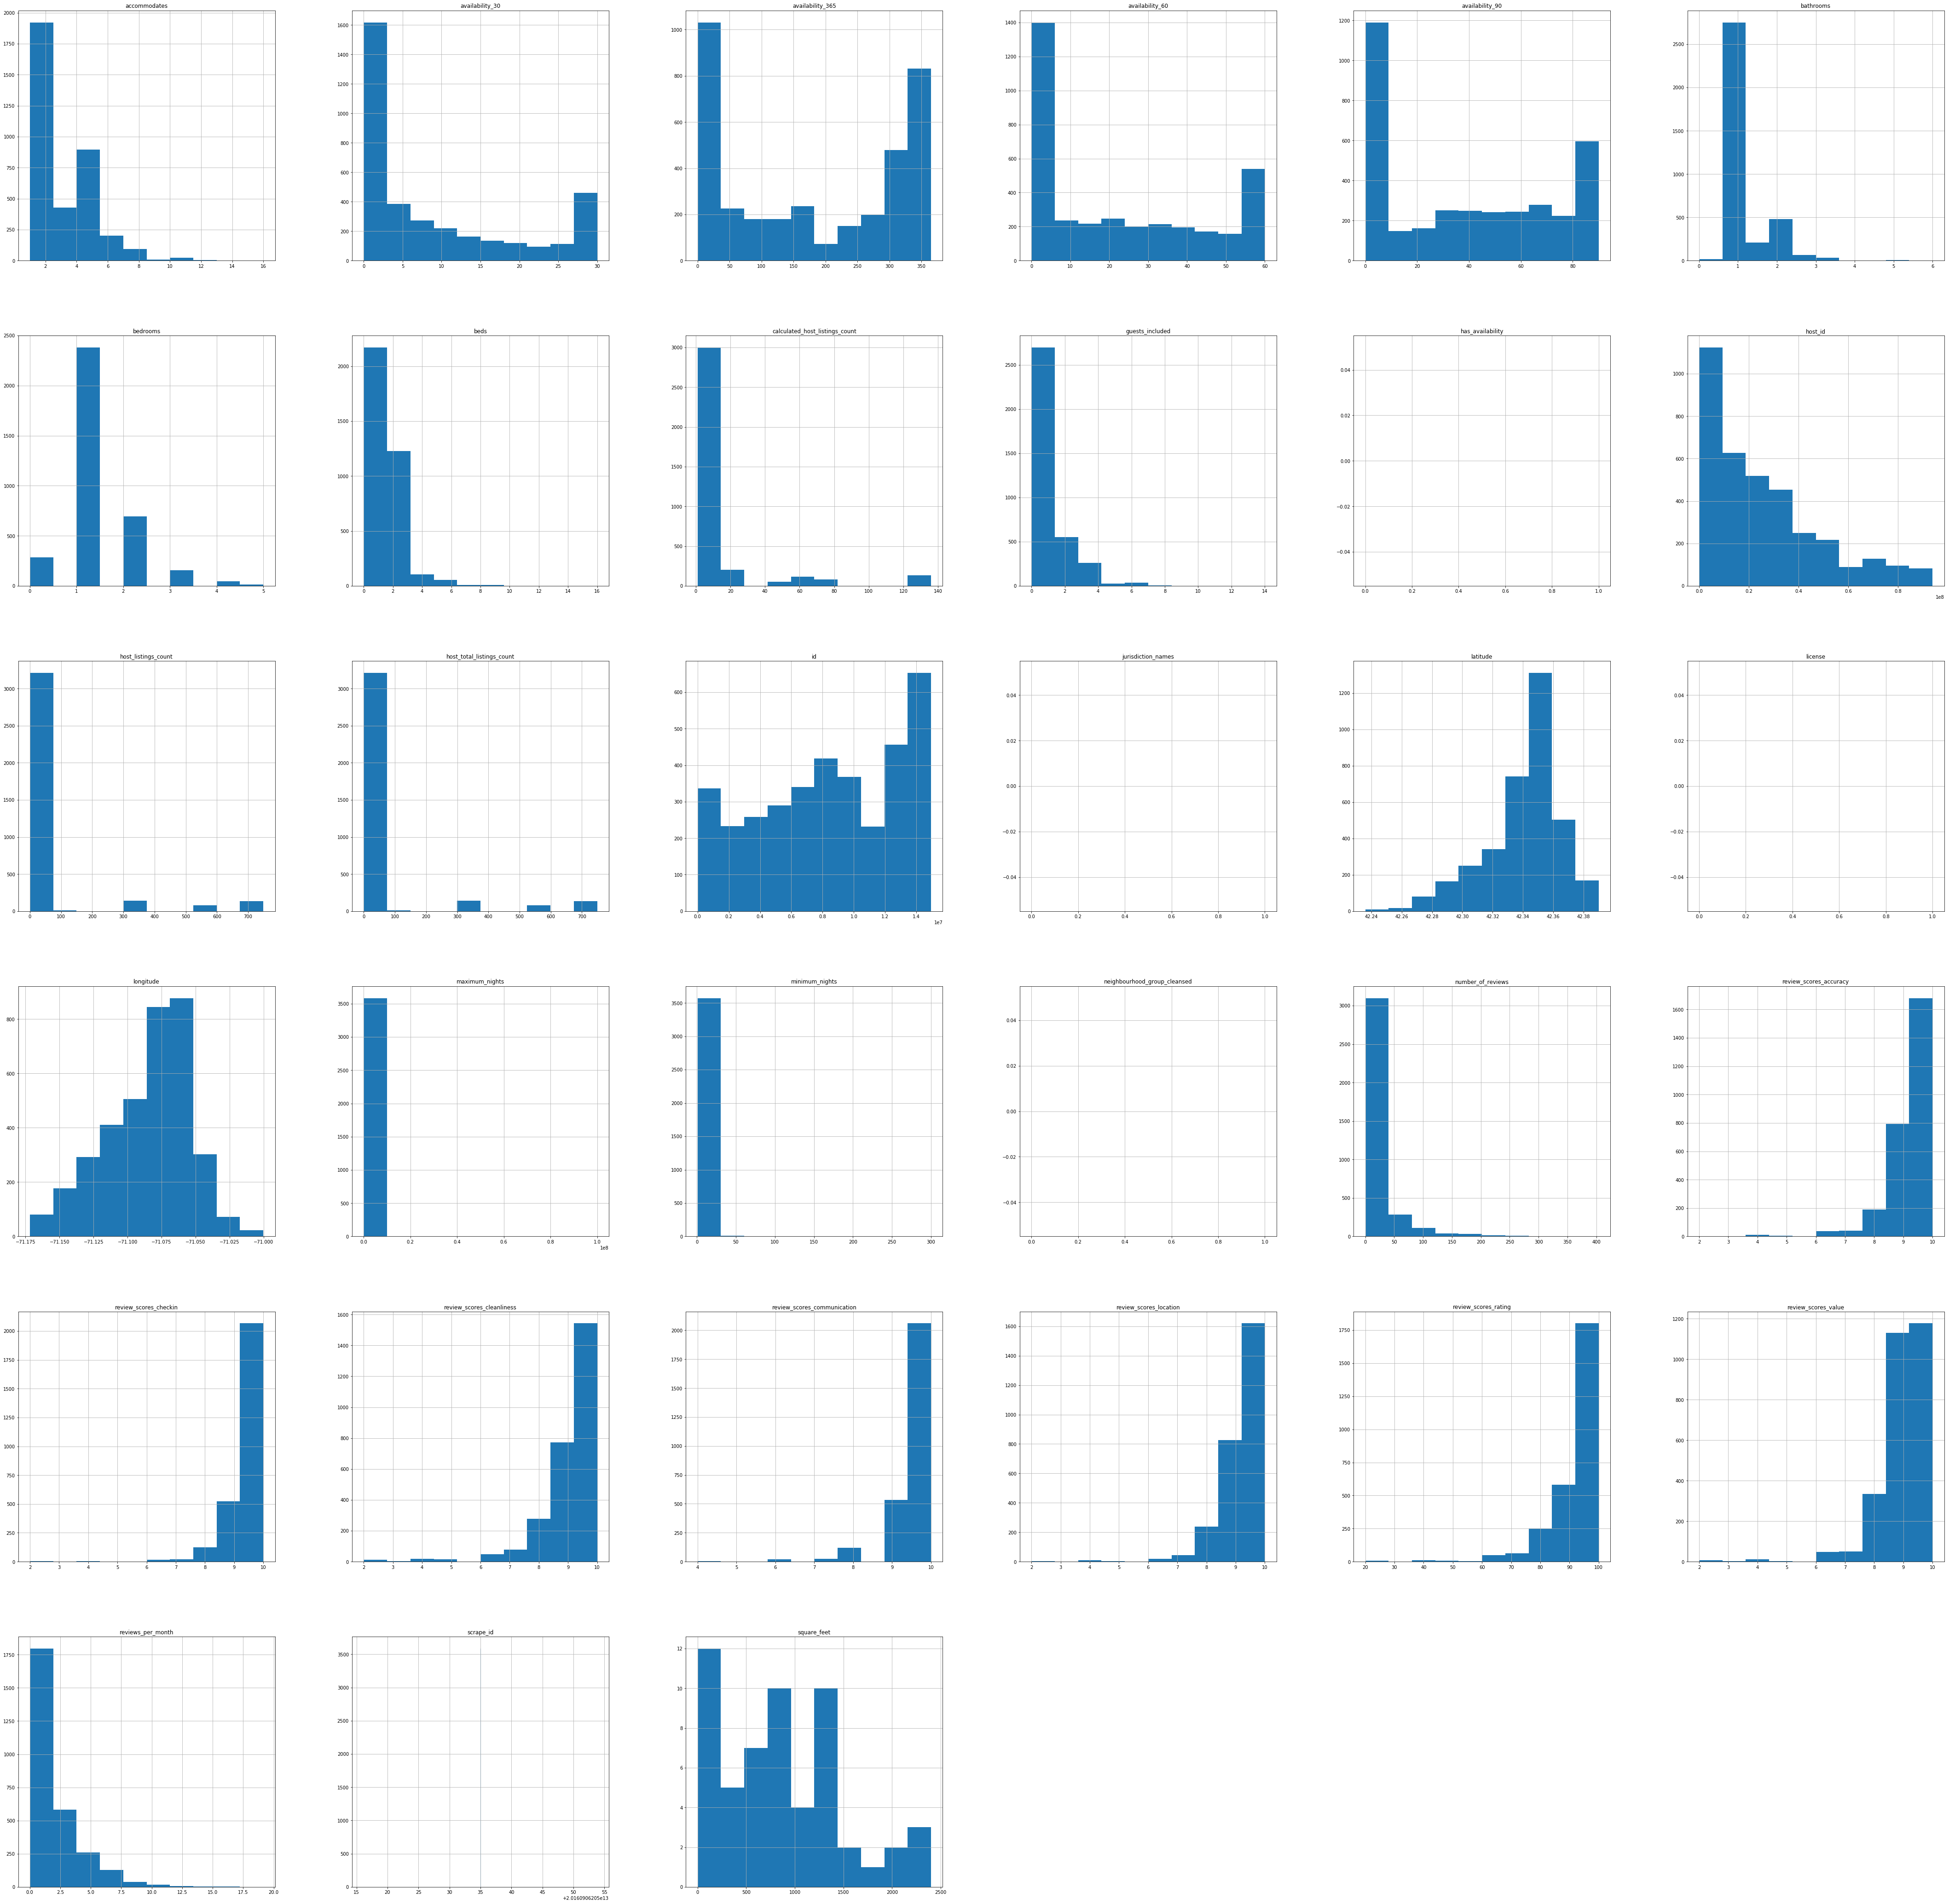

In [12]:
df.hist(figsize=(75,75)) #note- we can double click on the plot below to read it OR we can plot individual histograms for parameter of interes

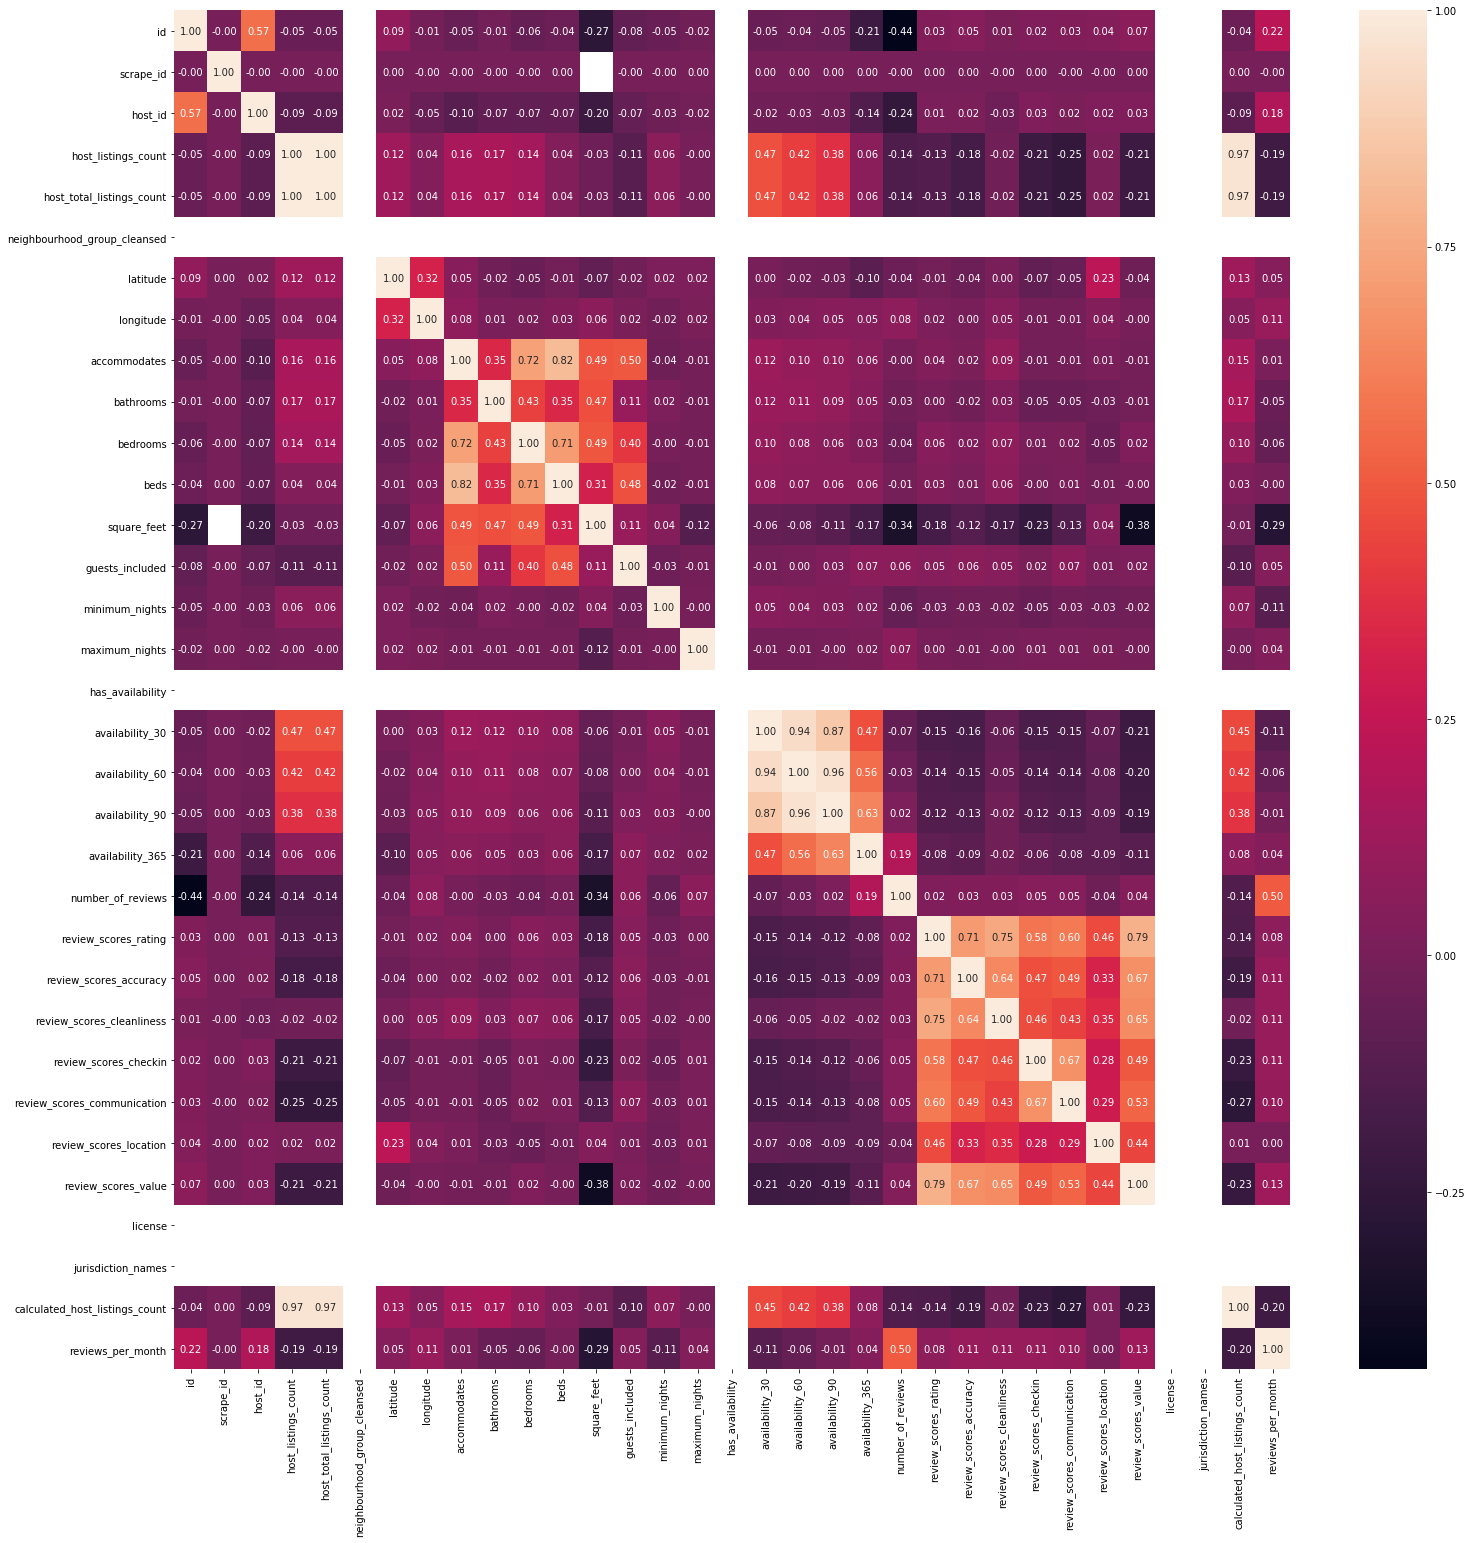

In [13]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
# again we can double click on the map below to read it OR polt individual maps.

## 2.1 Lets see which Neighborhoods have the highest ratings in Boston.

In [46]:
top10_neighborhoods_rated= df[['neighbourhood_cleansed', 'review_scores_value','latitude', 'longitude']].groupby(by='neighbourhood_cleansed').mean().sort_values('review_scores_value', ascending=False).head(10)
top10_neighborhoods_rated.reset_index(inplace=True)
top10_neighborhoods_rated

,neighbourhood_cleansed,review_scores_value,latitude,longitude
0,Leather District,9.666667,42.351241,-71.058040
1,Roslindale,9.580000,42.284490,-71.131020
2,West Roxbury,9.454545,42.282511,-71.156261
3,Jamaica Plain,9.450847,42.311871,-71.110171
4,South Boston,9.379085,42.334991,-71.047037
5,Charlestown,9.368421,42.379216,-71.066982
6,Longwood Medical Area,9.333333,42.340455,-71.108317
7,North End,9.325000,42.365239,-71.054493
8,South End,9.263941,42.342239,-71.073943
9,Beacon Hill,9.244048,42.359034,-71.067850


In [47]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\AnacondaInsHere

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          63 KB

The following packages will be UPDATED:

  ca-certificates     pkgs/main::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0
  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1
  geopy                                         1.21.0-py_0 --> 1.22.0-pyh9f0ad1d_0
  openssl              pkgs/main::openssl-1.1.1c-he774522_1 --> conda-forge::openssl-1.1.1f-hfa6e2cd_0

The following packages will be SUPERSEDED by a higher-p

In [48]:
address = 'USA'
geolocator = Nominatim(user_agent="usa-explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of USA are 39.7837304, -100.4458825.


In [49]:
# create map of Boston for locations with best 'ratings' using latitude and longitude values
map_boston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(top10_neighborhoods_rated['latitude'], top10_neighborhoods_rated['longitude'], top10_neighborhoods_rated['neighbourhood_cleansed']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
    
map_boston

## 2.2 Lets see which Neighborhoods have the highest price in Boston.

In [63]:
# 'price' column is object. we need to convert it into float firts. Notice it has '$' and ','sign, so we ned to seperate that
# and then convert the numerical part to 'float'

In [79]:
#df['price'] = df['price'].str.replace(',','').str.replace('$','').astype('str')
#df['price'] = df['price'].astype('float')

In [118]:
df['price'].dtype

dtype('float64')

In [119]:
df['price'].isnull().sum()

0

In [120]:
top10_neighborhoods_price= df[['neighbourhood_cleansed', 'price','latitude', 'longitude']].groupby(by='neighbourhood_cleansed').mean().sort_values('price', ascending=False).head(10)
top10_neighborhoods_price.reset_index(inplace=True)
top10_neighborhoods_price

,neighbourhood_cleansed,price,latitude,longitude
0,South Boston Waterfront,306.060241,42.348804,-71.045027
1,Bay Village,266.833333,42.349222,-71.068435
2,Leather District,253.600000,42.351241,-71.058040
3,Back Bay,240.950331,42.349465,-71.081209
4,Downtown,236.459302,42.356562,-71.061080
5,Chinatown,232.352113,42.350481,-71.061289
6,Beacon Hill,224.443299,42.359034,-71.067850
7,Fenway,220.393103,42.345094,-71.095942
8,West End,209.591837,42.364140,-71.068259
9,South End,204.349693,42.342239,-71.073943


In [122]:
# create map of Boston for locations with highest 'price' using latitude and longitude values
map_boston_price = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(top10_neighborhoods_price['latitude'], top10_neighborhoods_price['longitude'], top10_neighborhoods_price['neighbourhood_cleansed']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston_price)  
    
map_boston_price

## 3. Lets see what features are corelated with price and build a linear regression model to predict price based on those factors

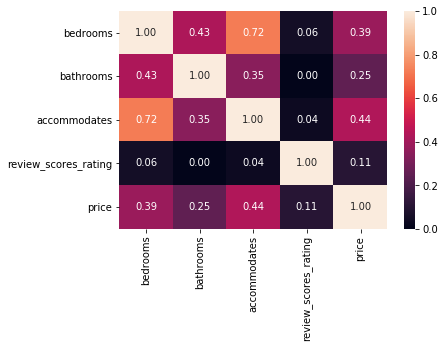

In [85]:
sns.heatmap(df[['bedrooms','bathrooms','neighbourhood_cleansed','accommodates','review_scores_rating','price']].corr(), annot=True, fmt='.2f')

In [86]:
#crete new df for LR on price
price_df = df[['bedrooms','bathrooms','neighbourhood_cleansed','accommodates','review_scores_rating','price']].copy()
price_df.head()

,bedrooms,bathrooms,neighbourhood_cleansed,accommodates,review_scores_rating,price
0,2.0,1.5,Roslindale,4,NaN,250.0
1,1.0,1.0,Roslindale,2,94.0,65.0
2,1.0,1.0,Roslindale,2,98.0,65.0
3,1.0,1.0,Roslindale,4,100.0,75.0
4,1.0,1.5,Roslindale,2,99.0,79.0


In [88]:
price_df.isnull().sum()

bedrooms                   10
bathrooms                  14
neighbourhood_cleansed      0
accommodates                0
review_scores_rating      813
price                       0
dtype: int64

In [90]:
#dropping NaNs from bedrooms and bathrooms
price_df.dropna(subset=['bedrooms','bathrooms'], inplace=True)

In [91]:
price_df.isnull().sum()

bedrooms                    0
bathrooms                   0
neighbourhood_cleansed      0
accommodates                0
review_scores_rating      808
price                       0
dtype: int64

In [92]:
#replacing NaNs in review_scores_rating bu its mean
price_df['review_scores_rating'].replace(np.nan, price_df['review_scores_rating'].mean(), inplace=True)

In [93]:
#ensuring I have clean price_df
price_df.isnull().sum()

bedrooms                  0
bathrooms                 0
neighbourhood_cleansed    0
accommodates              0
review_scores_rating      0
price                     0
dtype: int64

In [94]:
price_df.head()

,bedrooms,bathrooms,neighbourhood_cleansed,accommodates,review_scores_rating,price
0,2.0,1.5,Roslindale,4,91.957864,250.0
1,1.0,1.0,Roslindale,2,94.000000,65.0
2,1.0,1.0,Roslindale,2,98.000000,65.0
3,1.0,1.0,Roslindale,4,100.000000,75.0
4,1.0,1.5,Roslindale,2,99.000000,79.0


In [110]:
price_df.shape

(3561, 6)

In [111]:
#Create X and y for regression
X = price_df[['bedrooms','bathrooms','neighbourhood_cleansed','accommodates','review_scores_rating']]
y = price_df['price']

In [112]:
# lest get dummies for 'neighborhood_cleansed' and concat that to X
features_onehot = pd.get_dummies(price_df['neighbourhood_cleansed'])
X = pd.concat([X,features_onehot], axis=1)

In [113]:
X.drop(columns='neighbourhood_cleansed', inplace=True)
X.head()

,bedrooms,bathrooms,accommodates,review_scores_rating,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,...,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury
0,2.0,1.5,4,91.957864,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,1.0,2,94.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1.0,2,98.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,1.0,4,100.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.5,2,99.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [115]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = .30)

In [116]:
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [117]:
y_test_preds = lm_model.predict(X_test)
r2_score(y_test, y_test_preds), len(y_test)
print("The R-sq score is", r2_score(y_test, y_test_preds), "on", len(y_test),"testing rows." )

The R-sq score is 0.36104566599619825 on 2492 testing rows.


In [124]:
from sklearn.metrics import mean_squared_error
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_preds - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_preds - y_test) ** 2))

Mean absolute error: 58.55
Residual sum of squares (MSE): 11709.94
